In [22]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [23]:
creator.create("obj", base.Fitness, weights=(-1.0,))
creator.create("Ind", list, fitness=creator.obj)

/Users/gwenchee/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'obj' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/gwenchee/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Ind' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [24]:
checkpoint_file="results/02-04/checkpoint.pkl"
with open(checkpoint_file, "rb") as cp_file:
    cp = pickle.load(cp_file)

In [25]:
logbook = cp["logbook"]

In [26]:
def get_ind_list(pop_list, index):
    ind_list = [] 
    for pop in pop_list:
        ind_list.append(pop[index])
    return ind_list

In [27]:
gen = logbook.select("gen")

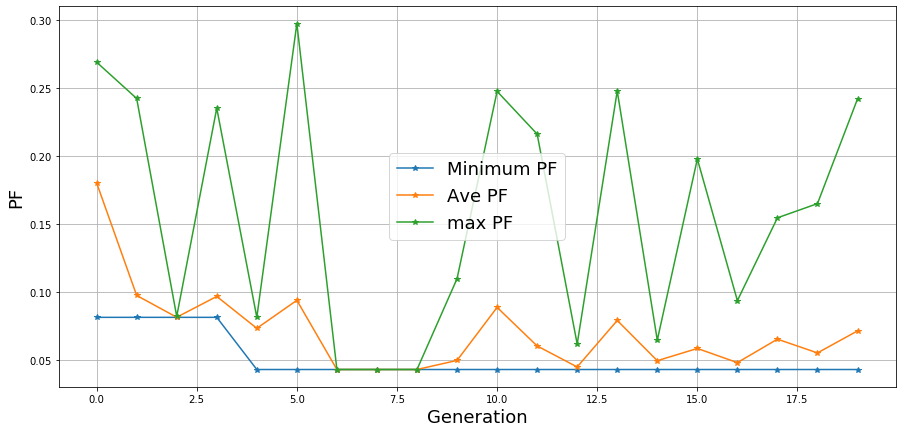

In [28]:
# Packing Fraction Plot
pf_min = get_ind_list(logbook.chapters["ind"].select("min"), 0)
pf_avg = get_ind_list(logbook.chapters["ind"].select("avg"), 0)
pf_max = get_ind_list(logbook.chapters["ind"].select("max"), 0)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(gen, pf_min, "*-", label="Minimum PF")
ax.plot(gen, pf_avg, "*-", label="Ave PF")
ax.plot(gen, pf_max, "*-", label="max PF")
ax.set_xlabel("Generation", fontsize=18)
ax.set_ylabel("PF", fontsize=18)
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18)

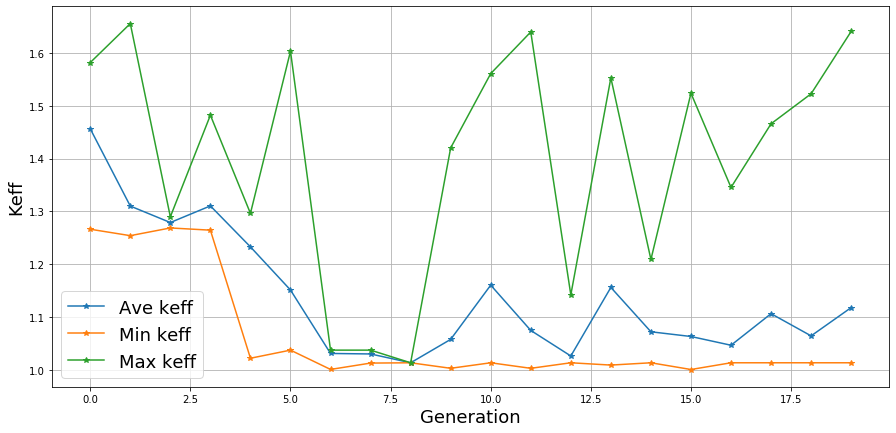

In [29]:
# keff plot
keff_avg = get_ind_list(logbook.chapters["oup"].select("avg"), 1)
keff_min = get_ind_list(logbook.chapters["oup"].select("min"), 1)
keff_max = get_ind_list(logbook.chapters["oup"].select("max"), 1)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(gen, keff_avg, "*-", label="Ave keff")
ax.plot(gen, keff_min, "*-", label="Min keff")
ax.plot(gen, keff_max, "*-", label="Max keff")
ax.set_xlabel("Generation", fontsize=18)
ax.set_ylabel("Keff", fontsize=18)
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18)

In [30]:
results = cp["all"]

IndexError: list index out of range

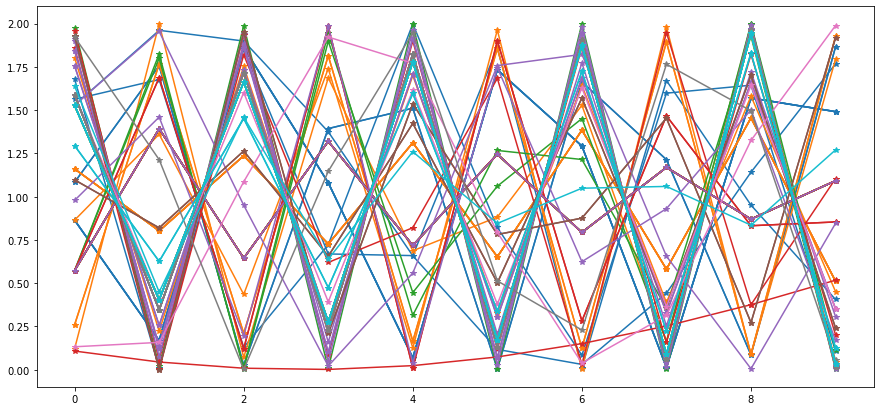

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
x = np.arange(0,10)
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
for i, pop in enumerate(results["populations"]):
    for j, ind in enumerate(pop):
        sine = 1 * np.sin(ind[1]*x + ind[2]) + 1 
        if j == 0:
            ax.plot(x, sine, label="gen "+str(i), marker='*', color=colors[i])
        else:
            ax.plot(x, sine, marker='*', color=colors[i])
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])